# 1814731 Shameel Nkosi
# 1390537 Siraj Motaung
# 1858893 Molefe Molefe

### Linear Regression tut

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### We implement both closed form solution and the gradient descent 

###### Closed form function 

In [2]:
def closedForm(X , y):
    X_transpose = np.transpose(X)
    
    # The Moore-Penrose Pseudo Inverse
    Y = np.linalg.inv(X_transpose.dot(X))
    theta = Y.dot(X_transpose.dot(y))
    return theta

##### Below is a funciton which calculated the error  between the true y values vs the estimated  y values

In [3]:
def Error(yTrue , yEst):
    error = 0
    
    for i in range(len(yTrue)):
        error += (yTrue[i] - yEst[i])**2
    error *= .5
    return error

### -> Below we write a function that calculates the values given a dataset of x values and parameters... we going to use these values for computing errors late

In [4]:
def results(Paragms, dataSet,noise):
    values = np.array([])
    
    for i in dataSet:
        y = Paragms[0] + noise
        for j in range(1,len(Paragms)):
            y += Paragms[j]*(i**j)
        values = np.append(values , [y])
    return values

###### Below we calculate a design matrix  of a polynomail basis function

In [5]:
def designMatrix(polyDegree , x):
    
    
    n = len(x)
    t = np.ones(n)
    X = np.array([t])
    X = np.append(X,[x], axis = 0)    
    
    for i in range(2 , polyDegree+1):
        temp = np.array([x[0]**i])
        
        for j in range (1 ,n):
            temp = np.append(temp , x[j]**i)
            
        X = np.append(X,[temp], axis = 0)    
            
    X = np.transpose(X)
    return X

#x = [0,1,2,3,4,5]
#y = [1.1, -.7, -2.6, -3.7, -2.9, 1]
#plt.scatter(x,y)
#print(designMatrix(2,x)[2])


###### Below we generate 150 data points (x values), the 3 random true parameters and the y values corresponding to the x values 

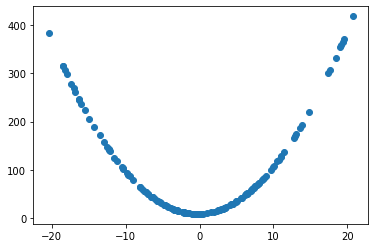

In [6]:
data_x = np.random.normal(0,10,150)
θ_ = np.random.rand(3)

noise = np.random.normal(0,10,1)[0]
data_y = results(θ_,data_x,noise)

    
plt.scatter(data_x , data_y)


#### Below we split the data we have into training , testing and validation sets

In [7]:
trainA = 100
testA = 30 + trainA
validA = 20 

x_train , x_test , x_validation = data_x[:trainA] , data_x[trainA:testA] , data_x[testA:]
y_train , y_test , y_validation = data_y[:trainA] , data_y[trainA:testA] , data_y[testA:]

#plt.scatter(x_train , y_train)
#plt.scatter(x_test , y_test)
#plt.scatter(x_validation , y_validation)

### 4 b. 
###### We begin by obtaining our theta i estimates using the closed form slolution
    we first obtain the design matrix of the 2nd degree polynomial
    We then calculate the Errors

In [8]:
DesignMatrix = designMatrix(2, x_train)
θ_est = closedForm(DesignMatrix , y_train)

yEst = results(θ_est,x_train,0)                         # Estimated values for our new parameters
yEstValidation = results(θ_est , x_validation , 0)      # Estimatated validation data used to calcute validation error
trainError = Error(y_train,yEst)                        # Training error
validationError = Error(yEstValidation , y_validation)  # Validation Error
print("True Parameters: ",θ_)
print("Estimated Parameters: ",θ_est)
print("Trainin Error: ",trainError)
print("Validation Error: ",validationError)

True Parameters:  [0.35109033 0.52649859 0.92537453]
Estimated Parameters:  [9.01013517 0.52649859 0.92537453]
Trainin Error:  1.1629450573640574e-24
Validation Error:  2.367797561457076e-25


#### 4 b. 
    ** These are very close. theta i where i is greater than one have the exact parameter and the difference is only in theta0 and the difference between the 2 is only the random noise we computed
    ** The errors values are very small which is what we expect

###### Below we plot the true y values as scatter plot and the estimates with the line plot

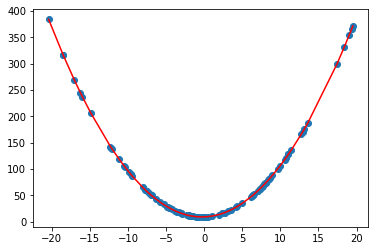

In [9]:
plt.scatter(x_train , y_train)
plt.plot(np.sort(x_train),results(θ_est,np.sort(x_train),0),color="red")

### FROM HERE WE NEED TO IMPLEMENT THE GRADIENT DESCENT
     * And we plot what our results 

array([1.00000188, 0.9999549 , 0.9992717 ])

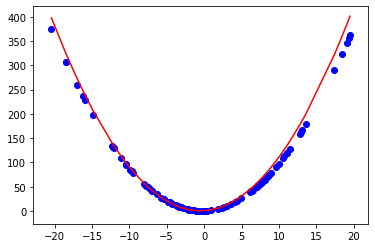

In [10]:
def f(x , θ):
    return np.dot(x,θ)

def gradientDescent(polyDegree , trainSetX , trainSetY):
    n = polyDegree         # Here I just set n = polyDegree so that I can work faster and not having to type everything
    θ = np.ones(n+1)       # we start with our theta values being ones
    θ_old = np.zeros(n+1)
    c = 0
    α = 1.12e-8
    
    
    #α = 1.1e-5            # define our learning rate
    X = designMatrix(n , trainSetX) 
    
    while np.sqrt(np.sum(np.power(θ - θ_old, 2))) > 0.01:
        θ_old = θ
        for i in range(len(X)):
            θ = θ - α*(f(X[i],θ) - trainSetY[i])*X[i]
        c += 1
    plt.plot(np.sort(x_train),results(θ,np.sort(x_train),0),color="red")
    plt.scatter(np.sort(x_train),results(θ_,np.sort(x_train),0),color="blue") 
    return θ
    

gradientDescent(2,x_train,y_train)


#### 4c
       i. starting with a decision matrix that of the third polynomial degree

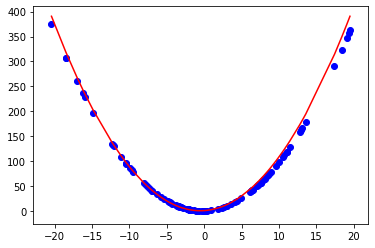

In [11]:
#we pass the training data

Matrix3 = designMatrix(3 , x_train)
θ3 = gradientDescent(3,x_train,y_train) # 3 for order 3

In [12]:
def gDWithReg(polyDegree , trainSetX , trainSetY):
    n = polyDegree         # Here I just set n = polyDegree so that I can work faster and not having to type everything
    θ = np.ones(n+1)       # we start with our theta values being ones
    θ_old = np.zeros(n+1)
    lamda = 1.2e-5
    α = 1.2e-8
    
    
    #α = 1.1e-5            # define our learning rate
    X = designMatrix(n , trainSetX) 
    
    while np.sqrt(np.sum(np.power(θ - θ_old, 2))) > 0.01:
        θ_old = θ
        for i in range(len(X)):
            if i is not 0:
                θ = θ - α*(f(X[i],θ) - trainSetY[i])*X[i] +lamda*f(θ,θ)
            else:
                θ = θ - α*(f(X[i],θ) - trainSetY[i])*X[i] # to avoid regularizing 0
            

    plt.plot(np.sort(x_train),results(θ,np.sort(x_train),0),color="red")
    plt.scatter(np.sort(x_train),results(θ_,np.sort(x_train),0),color="blue") 
    return θ

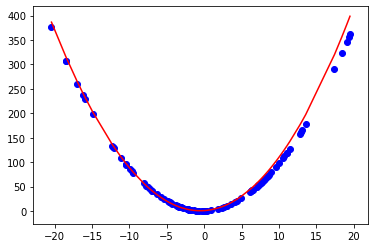

In [13]:
θ_R = gDWithReg(3,x_train,y_train) # R for regularisation

######  C. iv. From the trainings above, We can deduce that the closed form solution gives the best performance then the 2nd order polynomial gradient descent then lastly the third order polynomial with regularization then without regularization. We have also noted the difference in the value alpha. Visually the difference is seen between the different order polynomials and less with regularization. Non of the gradient descent was able to achieve a better Error than the closed form solution

###### C. v. The gradient descent with the right features and order 2 polynomial performed better than one with higher order and with regularization. though regularization did improve the error we've found. It is therefore better to use a model with the necessary features than using a model with higher order and with regularization